___

<a href='https://www.instagram.com/code.it29/'><img src='code.it29.jpeg'/></a>
___
<center><em>Content Copyright by @code.it29 (Shouhaddo Paul)</em></center>

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import AveragePooling2D, Flatten, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.applications import MobileNetV2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [20]:
INIT_LR = 0.001
EPOCHS = 10
BS = 32

In [6]:
DIRECTORY = r"facemask_dataset/"
CATEGORIES = ["with_mask", "without_mask"]

[INFO] loading images...


In [7]:
data = []
labels = []

In [8]:
for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
    	img_path = os.path.join(path, img)
    	image = load_img(img_path, target_size=(224, 224))
    	image = img_to_array(image)
    	image = preprocess_input(image)

    	data.append(image)
    	labels.append(category)

C:\Users\Win10\Anaconda3\lib\site-packages\PIL\Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [9]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [10]:
data = np.array(data, dtype="float32")
labels = np.array(labels)

In [11]:
(trainX, testX, trainY, testY) = train_test_split(data, labels,test_size=0.20, stratify=labels, random_state=101)

In [12]:
aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

In [13]:
baseModel = MobileNetV2(weights="imagenet", include_top=False,
	input_shape=(224, 224, 3))

9412608/9406464 [==============================] - 26s 3us/step


In [14]:
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel) 

In [15]:
model = Model(inputs=baseModel.input, outputs=headModel) 

In [16]:
for layer in baseModel.layers:
	layer.trainable = False


In [18]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"]) 


In [21]:
H = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)

Epoch 1/10
95/95 [==============================] - 227s 2s/step - loss: 0.0453 - accuracy: 0.9852 - val_loss: 0.0229 - val_accuracy: 0.9935
Epoch 2/10
95/95 [==============================] - 194s 2s/step - loss: 0.0254 - accuracy: 0.9924 - val_loss: 0.0253 - val_accuracy: 0.9883
Epoch 3/10
95/95 [==============================] - 217s 2s/step - loss: 0.0359 - accuracy: 0.9862 - val_loss: 0.0274 - val_accuracy: 0.9896
Epoch 4/10
95/95 [==============================] - 194s 2s/step - loss: 0.0245 - accuracy: 0.9921 - val_loss: 0.0227 - val_accuracy: 0.9909
Epoch 5/10
95/95 [==============================] - 197s 2s/step - loss: 0.0273 - accuracy: 0.9904 - val_loss: 0.0164 - val_accuracy: 0.9935
Epoch 6/10
95/95 [==============================] - 231s 2s/step - loss: 0.0303 - accuracy: 0.9908 - val_loss: 0.0412 - val_accuracy: 0.9844
Epoch 7/10
95/95 [==============================] - 186s 2s/step - loss: 0.0158 - accuracy: 0.9947 - val_loss: 0.0179 - val_accuracy: 0.9896
Epoch 8/10
95

In [22]:
model.save("mask_detection.model", save_format="h5")

In [32]:
 H.history["val_accuracy"]

[0.9934810996055603,
 0.9882659912109375,
 0.9895697236061096,
 0.9908735156059265,
 0.9934810996055603,
 0.9843546152114868,
 0.9895697236061096,
 0.9895697236061096,
 0.9921773076057434,
 0.9869621992111206]

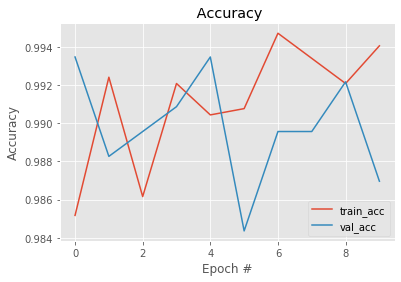

In [34]:
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
#plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
#plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title(" Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")

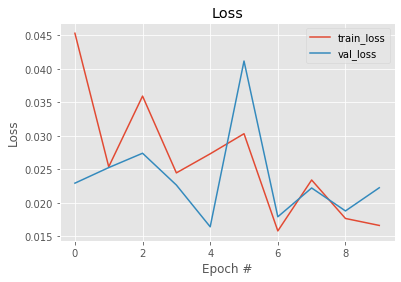

In [35]:
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.title("Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")

___

<a href='https://www.instagram.com/code.it29/'><img src='code.it29.jpeg'/></a>
___
<center><em>Content Copyright by @code.it29 (Shouhaddo Paul)</em></center>